 # Time Series Data Set, Time Series Components, and Autocorrelation.

### Import required packages.

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

import matplotlib.pylab as plt
%matplotlib inline


### Create time series data set.

In [2]:
# Create Amtrak data frame.
Amtrak_data = pd.read_csv('Amtrak_comp.csv')

# Display the first 5 records of Amtrak data set.
print('First 5 Records of Amtrak Data Set')
print(Amtrak_data.head())

# Convert the date information to a datetime object as monthly data.
Amtrak_data['Date'] = pd.to_datetime(Amtrak_data.Month)

# Convert data set to time series  data set. Name is used 
# to label the data.
ridership_ts = pd.Series(Amtrak_data.Ridership.values, 
                index=Amtrak_data.Date, name='Ridership')

# Display first 5 records of Amtrak time series.
print()
print('First 5 Records of Amtrak Time Series')
print(pd.DataFrame(ridership_ts.head()))

# Define Amtrak time series frequency as month 'MS'. 
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, freq = 'MS')

# Display time series index.
print()
print('Time Series Index')
print(ridership_ts.index)


First 5 Records of Amtrak Data Set
      Month  Ridership
0  1/1/1991   1708.917
1  2/1/1991   1620.586
2  3/1/1991   1972.715
3  4/1/1991   1811.665
4  5/1/1991   1974.964

First 5 Records of Amtrak Time Series
            Ridership
Date                 
1991-01-01   1708.917
1991-02-01   1620.586
1991-03-01   1972.715
1991-04-01   1811.665
1991-05-01   1974.964

Time Series Index
DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=336, freq='MS')


### Develop time series components and plot them.

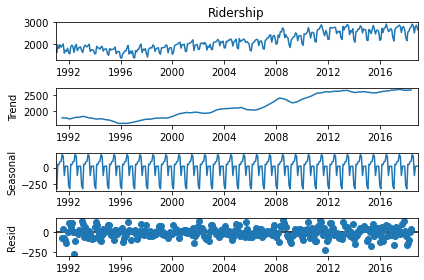

In [3]:
# Use seasonal_decompose to develop time series components.
ridership_stl = seasonal_decompose(ridership_ts, model='additive')

# Plot time series components.
ridership_stl.plot()
plt.show()


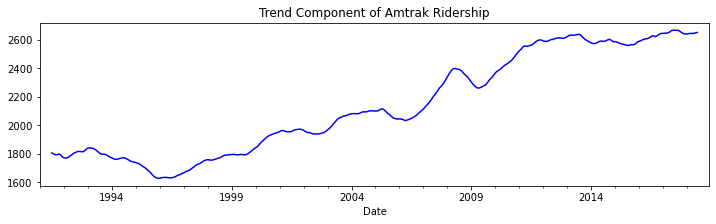

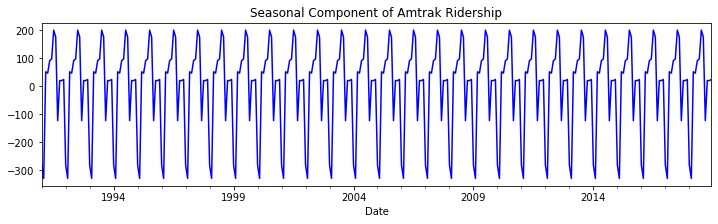

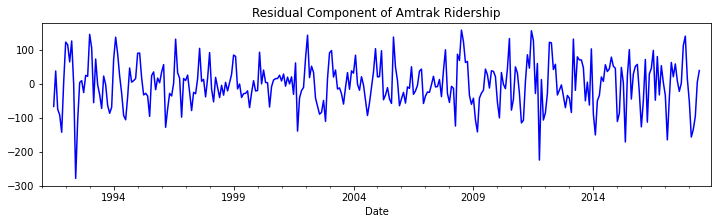

In [4]:
# Use seasonal_decompose to develop time series components.
ridership_stl = seasonal_decompose(ridership_ts, model='additive')

# Use functions trend(), seasonal(), and resid()
# to print time series components separately.

# Trend component plot.
ax1 = ridership_stl.trend.plot(figsize = (12,3), color = 'blue')
plt.title('Trend Component of Amtrak Ridership') 
plt.show()

# Seasonal compoenet plot.
ax1 = ridership_stl.seasonal.plot(figsize = (12,3), color = 'blue')
plt.title('Seasonal Component of Amtrak Ridership') 
plt.show()

# Residual (reminder)component plot.
ax1 = ridership_stl.resid.plot(figsize = (12,3), color = 'blue')
plt.title('Residual Component of Amtrak Ridership') 
plt.show()


### Develop and display autocorrelation graph and autocorrelation coefficients.

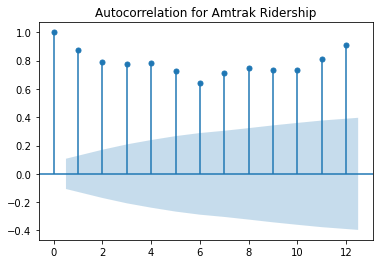

In [5]:
# Use plot_asf from tsaplots to develop autocorrelation 
# function and plot it. 
tsaplots.plot_acf(ridership_ts, lags = 12)
plt.title('Autocorrelation for Amtrak Ridership')
plt.show()


In [6]:
# Use stattools.acf fuction to calculate autocorrelation 
# coefficients. 
autocor = np.round(stattools.acf(ridership_ts, nlags = 12, fft=False), 3)

# Create a table (data frame) with autocorrelation coefficeints and
# display it. 
df = pd.DataFrame(autocor)
df.columns = ['Autocor. Coeff.']
df

,Autocor. Coeff.
0,1.000
1,0.877
2,0.789
3,0.776
4,0.779
5,0.728
6,0.643
7,0.715
8,0.750
9,0.733
